# Dashboards

<a href="../../_slides/chapter-14-slides.html">See also the slides that summarize a portion of this content.</a>


## What's a dashboard and why do we have them?

You've been learning a lot of data manipulation and analysis in Python.  But Python is an environment that only data professionals and scientists tend to dive into.  What happens when you want to let non-technical people browse your work?

Most of the time, we write reports or create slide decks to share our results.  But sometimes the experience of exploring the data is more powerful than a static report or pre-packaged slide deck can ever be.  Sometimes the manager who asked for the analysis wants to experiment with various parameter values themself, especially if they were a data analyst once, too.

This is where *dashboards* come in.  A quick [Google image search for "data dashboards"](https://www.google.com/search?q=data+dashboard&tbm=isch) will show you dozens of examples of what dashboards look like.  Their purpose is to let the user explore the data using inputs like buttons and sliders, and seeing outputs that are typically data visualizations and summaries.  Dashboards don't give the user anywhere near as much flexibility as you have in Python, but they're much easier and faster.

```{admonition} Big Picture - Uses for data dashboards
---
class: alert alert-primary
---
There are many reasons why you might prepare a data dashboard.  Here are a few.
 * **There are many different inputs to which you could apply an analysis, and you want to let the user explore each.**  For instance, you recently built a visualization for comparing property values in home mortgage applications across two races.  But it could be more powerful if we let the user choose two races, and the analysis would automatically be repeated for those two.  The user could choose values that matter to them personally or professionally.
 * **An analysis has a tuning parameter that might benefit from exploration by an expert.**  For instance, let's say you have a model that takes as input a price for a new insurance product, and forecasts adoption rates and various probabilities associated with profits and losses under various conditions.  The person ultimately in charge of making the decision on product price might like to move a slider that controls the price input, and take their time to consider each of the possible scenarios in your model's output.
 * **Some projects are not a data analysis, but just a data showcase.**  I mentioned in a previous class that a friend of mine runs a nonprofit that helps universities make, track, and keep climate commitments.  [Their data dashboard is here.](https://reporting.secondnature.org/)  It doesn't do any analysis, but makes their data transparent and interactive, for anyone to explore for their own purposes.
 * **Another team wants to see what you're doing, but they don't want to read your code.**  To quickly share what you've been working on without forcing the recipient to dive into all of your Python code, you can wrap your work in a dashboard and share it on the web.  This lets you get feedback from other teams in your organization about your team's work.
```

There are many tools for creating dashboards.  One of the most popular is [Tableau](https://www.tableau.com/trial/dashboards), but we are not studying it in this course for two reasons.  First, it is proprietary software, which makes it less transferable knowledge than free tools.  Second, it is much easier to learn Tableau later on your own than it is to learn Python.  There are many Tableau training opportunities available online and in the corporate world should you need them.

There are also Python-specific frameworks for creating dashboards.  The easiest one I've found to get started with is what we will learn today, [Streamlit](https://www.streamlit.io/).  But a few others are mentioned at the end of this chapter for you to explore on your own if you desire.  These course notes assume that you have already done the following three things.  They're necessary in order to follow along with the content here.
 1. Installed Streamlit (`pip install streamlit`)
 2. [Registered](https://signup.heroku.com/) for a Heroku account
 3. Installed the Heroku [command-line interface](https://devcenter.heroku.com/articles/getting-started-with-python?singlepage=true#set-up)

## Our running example

In this section, I will do a small data visualization that we will turn into a dashboard throughout the rest of these course notes, so that you can see an example of how to convert existing code into a dashboard.  The small amount of code (and explanation of that code) that we will convert into a dashboard appears between the two horizontal lines below.

---

### Example begins here

In statistics, the Central Limit Theorem (CLT) says that if have several random variables, and we define a new random variable to be their sum, then that new random variable has a shape vaguely like a normal distribution.  Furthermore, if you increase the number of random variables in the sum, then that sum becomes even more precisely like a normal distribution.  Let's see this in action with some Python simulations.

First, we'll need NumPy to generate random numbers for us, and we'll use the generic uniform distribution for this simulation.

In [1]:
import numpy as np
np.random.rand( 10 )  # Make sure we can generate 10 random values in [0,1]

array([0.02842214, 0.81119674, 0.53157605, 0.86342282, 0.93218777,
       0.42328714, 0.34510009, 0.08866329, 0.23075973, 0.34200095])

The CLT says that we can make a new random variable by summing those numbers.  Let's do so.

In [2]:
def my_random_variable ():
    return np.random.rand( 10 ).sum()

my_random_variable()  # Test it

4.86366937905601

That random variable is supposed to look sort of like a bell-shaped curve.  Let's sample 1000 values from it and make a histogram to see if that's true.

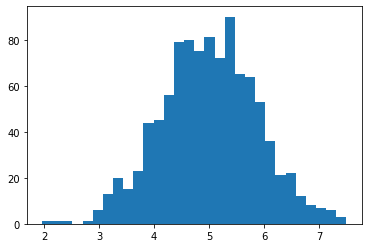

In [8]:
import matplotlib.pyplot as plt
sample = [ my_random_variable() for i in range(1000) ]
plt.hist( sample, bins=30 )
plt.show()

Yes, that looks like a bell curve!  Its mean and standard deviation are as follows.

In [7]:
np.mean( sample ), np.std( sample )

(4.989276203690257, 0.9204788579003654)

---

That's it.  Between those two horizontal lines is a little statistics experiment that we will want to turn into a dashboard.  In doing so, we'll make it much more interactive than it is when it's sitting, pre-computed, on a web page or PDF of these course notes.

## Step 1: We need a Python script

In this course, I don't make any restrictions on whether you program in Python scripts (`.py`) or Jupyter notebooks (`.ipynb`).  But Streamlit is an exception; it forces us to use Python scripts.  If you're already in the habit of doing all your data work in Python scripts, then you can skim the rest of this section and pick up in Step 2.  But if you're usually a Jupyter user, the good news is that you can convert a notebook into a Python script in just a few clicks, using Jupyter itself.
 1. From the File menu, choose Export Notebook As..., and choose Export Notebook to Executable Script.
 2. This will download the result as a Python script to your computer.  The browser may warn you that it's dangerous to download and run Python scripts.  Although that's true in general, if you wrote the script, it should be safe for you to download!
 3. The file will probably end up in your downloads folder, and you'll want to move it from there to wherever you keep your course work.

If you're a Jupyter user, you can still edit the Python script using Jupyter.  In addition to letting you edit notebooks, Jupyter supports editing of Python files and many other file types.

If I take the example shown above and run this process on it, I get the following Python script.  Notice how Jupyter turns all the Markdown content of my notebook into Python comments and marks each cell as a numbered input (`In[1]`, `In[2]`, etc.).

```python
# ### Example begins here
#
# In statistics, the Central Limit Theorem (CLT) says that if have several random variables, and we define a new random variable to be their sum, then that new random variable has a shape vaguely like a normal distribution.  Furthermore, if you increase the number of random variables in the sum, then that sum becomes even more precisely like a normal distribution.  Let's see this in action with some Python simulations.
#
# First, we'll need NumPy to generate random numbers for us, and we'll use the generic uniform distribution for this simulation.

# In[1]:


import numpy as np
np.random.rand( 10 )  # Make sure we can generate 10 random values in [0,1]


# The CLT says that we can make a new random variable by summing those numbers.  Let's do so.

# In[2]:


def my_random_variable ():
    return np.random.rand( 10 ).sum()

my_random_variable()  # Test it


# That random variable is supposed to look sort of like a bell-shaped curve.  Let's sample 1000 values from it and make a histogram to see if that's true.

# In[4]:


import matplotlib.pyplot as plt
sample = [ my_random_variable() for i in range(1000) ]
plt.hist( sample, bins=30 )
plt.show()


# Yes, that looks like a bell curve!  Its mean and standard deviation are as follows.

# In[5]:


np.mean( sample ), np.std( sample )
```

Running that Python script will produce the same plot that's shown in this Jupyter notebook.  If you're using a Python IDE, it will typically appear in that IDE.  If you're running it from the terminal, it will probably pop up a separate Python window showing the plot, and your script will terminate once you've closed the window.

Although comments in code are great, the comments above look like they belong in an interactive notebook that someone would read, with the output and pictures included.  So they're not the kind of comments we need in a Python script.  To make things more succinct, I'm going to delete them.  That produces the following Python code.

```python
import numpy as np
np.random.rand( 10 )

def my_random_variable ():
    return np.random.rand( 10 ).sum()

my_random_variable()

import matplotlib.pyplot as plt
sample = [ my_random_variable() for i in range(1000) ]
plt.hist( sample, bins=30 )
plt.show()

np.mean( sample ), np.std( sample )
```

Notice also that three lines in the code don't actually do anything.  In Jupyter, a line of code like `np.random.rand( 10 )` (the second line of the above code), when placed at the end of a cell, will show its output to us in the notebook.  But in a Python script, without a `print()` function call, it won't show us anything.  But that line of code, together with the `my_random_variable()` line later, were both done as little tests to see if our code was working correctly.  We don't need to see their output in our Python script, so I'll delete those lines.

However, the final line of code may be interesting to us, because the CLT actually speaks about the mean and standard deviation of the resulting random variable.  So we might like to see that value.  I'll add some `print()` function calls so that our script displays those values in a readable way.  I'll also clean it up by moving all the imports the top.

```python
import numpy as np
import matplotlib.pyplot as plt

def my_random_variable ():
    return np.random.rand( 10 ).sum()

sample = [ my_random_variable() for i in range(1000) ]
plt.hist( sample, bins=30 )
plt.show()

print( 'Mean:', np.mean( sample ) )
print( 'Standard deviation:', np.std( sample ) )
```

Before proceeding to Step 2, be sure that you can successfully run your newly created Python script and verify that it generates the output you want.  Once you've done so, you have a Python script that we're ready to bring into Streamlit.

## Step 2. Converting your script to use Streamlit

This step is very easy, but the results are not very spectacular (yet).  You simply take your existing Python script and make the following easy changes.
 1. Add `import streamlit as st` to the top of the file, before anything else.  (This imports all the Streamlit tools into your script.)
 2. Change any `print()` function call in your script to `st.write()` instead.  (This replaces ordinary Python printing, which goes to the terminal, with Streamlit printing, which will go to the dashboard you're creating.)
 3. Change any `plt.show()` function call in your script to `st.pyplot()` instead.  (This replaces ordinary Python plotting, which appears in its own window or in your IDE, with Streamlit plotting, which will go to the dashboard you're creating.)

If we make these changes to the script above, we get the following result.

```python
import streamlit as st
import numpy as np

def my_random_variable ():
    return np.random.rand( 10 ).sum()

import matplotlib.pyplot as plt
sample = [ my_random_variable() for i in range(1000) ]
plt.hist( sample, bins=30 )
st.pyplot()

st.write( 'Mean:', np.mean( sample ) )
st.write( 'Standard deviation:', np.std( sample ) )
```

But now this script cannot be run with Python alone; now it must be run using Streamlit, which provides the entire context of a web page and automatic reloading of your script as needed, etc.  Thus you need to run the following command from your computer's terminal, in the same folder as your script.  My script is called `central-limit-theorem.py`, but yours will have a different name.

```
streamlit run central-limit-theorem.py
```

If you're using Jupyter to edit your Python script, you can start a new terminal from the Launcher in Jupyter, and type the above command in it.  You may need to use `cd` to switch into the appropriate folder.  If you're not familiar with changing folders using `cd`, you may benefit from a tutorial on basic command line use.  Here is [one for Unix and Mac](https://swcarpentry.github.io/shell-novice/02-filedir/index.html) and here is [one for Windows](https://www.computerhope.com/issues/chusedos.htm).

When I do so, it opens a page in my browser showing me a tiny little dashboard app!  Here is a screenshot.

![Screenshot of a small Streamlit dashboard app](_images/streamlit-screenshot-1.png)

You may notice that the terminal in which you ran `streamlit run ...` did not return you immediately to your prompt.  The Streamlit environment is still running, and will let you refresh your app if you update the Python script on which it's built.  If you want to stop the Streamlit environment (say, when you're done working) you can go to the terminal and press Ctrl+C.

In fact, let's try updating the Python script now.  Make a small change, such as changing the text "Mean:" to "Sample mean:" and then saving the Python script.  The web page should pop up a small information indicator in the top right, like the one shown below.

![Streamit menu, reading "Source file changed; Rerun/Always Rerun"](_images/streamlit-menu.png)

It's asking if you want to rebuild your app since it changed.  I click "Always rerun" so that, in the future, every time I update my Python script *and save it,* the dashboard app I'm building will automatically be reloaded without any effort on my part.

## Step 3. Abstraction

Recall from [Chapter 7 of these notes](chapter-7-abstraction) the techniques we have for making code more general.  These include noting when a specific computation may need to be done more than once with varying inputs, and turning that code into a function.

When using Streamlit to build a dashboard, the power it provides is that it will run our *entire Python script* as many times as needed, with inputs chosen by the user.  To make this happen, we first need to choose which parts of our script are going to become parameters that the user can change.  The first step in this process is to give each of those values names and turn them into variables that we declare at the top of our script.

In the small example we're using in this chapter, I have just two places where I will turn constants into parameters.  One constant is how many uniform random variables we will include in our sum (formerly fixed at 10) and the other is how large will be the sample we use to create our histogram (formerly fixed at 1000).  Here is a new version of the code in which those two parameters are declared up front.

```python
import streamlit as st
import numpy as np

num_random_variables_to_sum = 10    # These two lines of code are new.
sample_size = 1000                  # Notice where they're used, below.

def my_random_variable ():
    return np.random.rand( num_random_variables_to_sum ).sum()

import matplotlib.pyplot as plt
sample = [ my_random_variable() for i in range(sample_size) ]
plt.hist( sample )
st.pyplot()

st.write( 'Sample Mean:', np.mean( sample ) )
st.write( 'Sample Standard Deviation:', np.std( sample ) )
```

If you save this Python script and revisit your dashboard app page, nothing should have changed, because the code produces the same results (except, of course, for small random variation inherent in the simulation).

## Step 4. Creating input controls

Streamlit makes it extremely easy to turn code like `sample_size = 1000` into code that lets the user of your dashboard choose the value of `sample_size`.  The most common way to let the user choose a number is with a slider input, which you can create in Streamlit with `st.slider()`.  You simply replace the constant 1000 with a call to the `st.slider()` function, and Streamlit automatically builds the user interface for you!

The function call looks like `st.slider("Prompt",min,max,default,step)`, where the parameters have the following meanings.
 * The prompt is a string that will appear in the dashboard, explaining to the user what the slider does.
 * The min and max values are required, and they determine the leftmost and rightmost values on the slider.
 * The default value is optional, but it can be used to specify where the slider begins when the dashboard is first loaded.
 * The step value is optional, but it says how far the slider moves in a single step.  For instance, if you want the user to only be able to choose whole numbers, set step to 1, so that they cannot move the slider in between whole numbers.

I add two `st.slider()` calls to our code as follows.

```python
import streamlit as st
import numpy as np

num_random_variables_to_sum = st.slider(
    "Include this many uniform random variables in the sum:",
    1, 100, 10, 1 )
sample_size = st.slider(
    "Create a histogram from a sample of this size:",
    100, 10000, 1000, 100 )

def my_random_variable ():
    return np.random.rand( num_random_variables_to_sum ).sum()

import matplotlib.pyplot as plt
sample = [ my_random_variable() for i in range(sample_size) ]
plt.hist( sample )
st.pyplot()

st.write( 'Sample Mean:', np.mean( sample ) )
st.write( 'Sample Standard Deviation:', np.std( sample ) )
```

This adds the following user interface to the top of my dashboard app.  It's finally interactive!

![Screenshot of two sliders, one for the number of random variables and the other for the sample size](_images/streamlit-sliders.png)

If you drag the sliders, you see the output update immediately.  *When you change an input slider, Streamlit automatically re-runs your entire Python script and updates the output in the page, typically very quickly.*  This happens every time you move one of the sliders.

## Step 5. Increasing Awesomeness

The above example was simple, but there are many ways you could make the application better.  Here are a few examples.

### New kinds of controls

A slider is not the only type of input.  Two other common ones you might want to have are detailed here, but a [comprehensive list](https://docs.streamlit.io/en/stable/api.html#display-interactive-widgets) appears on the Streamlit website.

To create a text box that accepts only numerical inputs, use `value = st.number_input("Prompt",min,max,default)`.  The only required paramater is the text prompt, and the other three are optional.

![Screenshot of a Streamlit number input control](_images/streamlit-number-input.png)

To create a drop-down list from which you can pick a value, use `choice = st.selectbox("Prompt",("List","of","options"))`.  By default, the first one is selected, but you can change it with an optional third parameter, the index of the default option.

![Screenshot of a Streamlit selectbox control](_images/streamlit-selectbox.png)


### Improve output clarity

The very simple app we've built so far would not make a lot of sense to anyone visiting it for the first time.  The explanation of the CLT from our notebook is gone, and the output shown in the dashboard is not explained.  We can add explanations back to our app with the `st.write()` command.  Provide it a string of Markdown content, just as you would put into a Jupyter notebook cell, and it will include it in your app.

```python
st.write( '''

# This would be a heading

Don't forget that you can use Python triple quotes to make a string
last over several lines, so that you can write as much as you want.

![A hilarious photo](http://www.imgur.com/your-hilarious-photo-url-here)

''' )
```

You can also improve output clarity by moving some things into the app's sidebar, which sits on the left by default, like on many websites.  You do this by replacing the relevant instances of `st` in your code with `st.sidebar`.  For example, while `st.slider("Choose a value:",1,100)` places a slider in the main part of the app, `st.sidebar.slider("Choose a value:",1,100)` puts it in the sidebar.

The one exception to this is that `st.write()` does not have a sidebar version; there is no `st.sidebar.write()`.  You can, however, still use `st.sidebar.markdown()` to display any kind of Markdown content in the sidebar.

If you don't want to have to deal with Markdown syntax, you can always call specific Streamlit functions like `st.title()`, `st.header()`, `st.subheader()`, and `st.text()`.

Applying these techniques to my dashboard can make it look much more clean and understandable.  Here are the results, in code and in a screenshot.

```python
import streamlit as st
import numpy as np

st.title( 'Central Limit Theorem Example' )

st.sidebar.markdown( '''
The Central Limit Theorem assumes you have a collection $X_1,\ldots,X_n$
of random variables that you will sum to create a new random variable
$X=\sum_{i=1}^n X_i$.  Here we will sum several
uniform random variables on the interval $[0,1]$.
You may choose the value of $n$ here.
''' )

num_random_variables_to_sum = st.sidebar.slider(
    "How many uniform random variables should we include in the sum?",
    1, 100, 10, 1 )

st.sidebar.markdown( '''
The Central Limit Theorem says that the new random variable $X$ will
be approximately normally distributed.  To visualize this, we will sample
many values from $X$ and create a histogram.  It should look more and more
like a bell curve as we increase $n$.
''' )

sample_size = st.sidebar.slider(
    "How large of a sample should we use to create the histogram?",
    100, 10000, 1000, 100 )

def my_random_variable ():
    return np.random.rand( num_random_variables_to_sum ).sum()

import matplotlib.pyplot as plt
sample = [ my_random_variable() for i in range(sample_size) ]
plt.hist( sample, bins=30 )
plt.title( f'Histogram of a sample of size {sample_size} from X' )
plt.xlabel( f'X = the sum of {num_random_variables_to_sum} uniform random variables on [0,1]' )
plt.ylabel( 'Frequency' )
st.pyplot()

st.write( f'''
Because each $\\mu_{{X_i}}=0.5$ and $n={num_random_variables_to_sum}$,
we conclude $\\mu_X=0.5\\times{num_random_variables_to_sum}={num_random_variables_to_sum*0.5}$.

Mean of our sample is $\\bar{{x}}={np.mean( sample )}\\approx{num_random_variables_to_sum*0.5}$.
''' )
```

![Screenshot of a complete Streamlit dashboard about the Central Limit Theorem](_images/streamlit-screenshot-2.png)

### Improve speed

If your dashboard loads a large dataset, or takes any other action that may consume a lot of time, then whenever a user adjusts any of the input controls, the dashboard will take a long time to respond, because it must load the entire dataset again, or whatever the long computation is.  You can improve this behavior by telling Streamlit to cache (remember) the value of the lengthy computation so that it doesn't unnecessarily redo it.

For instance, recall the many times we've loaded the (somewhat large) sample of mortgage applications with code like the following.

```python
df = pd.read_csv( 'practice-project-dataset-1.csv' )
```

We can tell Streamlit to cache the results of this by taking the slow or complex code and moving into its own function, one that takes no parameters and returns the result of the lengthy computation.  We then call the function to get the result.

```python
def load_mortgage_data ():
    return pd.read_csv( 'practice-project-dataset-1.csv' )

df = load_mortgage_data()
```

Of course, this behaves exactly like it did before, but now we can add a special Streamlit flag that enables caching for the function we've written.  The code looks like the following; the only new part is the first line.

```python
@st.cache
def load_mortgage_data ():
    return pd.read_csv( 'practice-project-dataset-1.csv' )

df = load_mortgage_data()
```

The `@st.cache` code tells Streamlit that the function immediately after it should be run only once, the first time the dashboard is launched, and any later attempt to call to the same function can just use the previously-loaded value, without actually re-running the function at all.

More information on Streamlit caching is available [here](https://docs.streamlit.io/en/stable/api.html#optimize-performance).

You now know how to create dashboard apps with a good bit of flexibility and sophistication!  The next question is how to deploy them to the web.  The second half of today's notes answer that question.

## Making your dashboard into a Heroku app

You can deploy a Streamlit dashboard to a website in many different ways.  Here, we will cover a tool used by many developers to deploy websites to a free cloud hosting platorm, Heroku.  While Heroku has paid plans for websites and web apps that get a lot of traffic, the free plan is far more than we need for our purposes.  As mentioned [above](#whats-a-dashboard-and-why-do-we-have-them), I expect that you've already registered for a Heroku account and installed their command line interface tools.  (The lessons I give below are inspired by a very helpful blog post I read on this technology; thanks to [Gilbert Tanner](https://gilberttanner.com/blog/deploying-your-streamlit-dashboard-with-heroku) for the original information.)

### Step 1. Make your project a git repository

This step has several parts.  Parts 1-3 need to be done only once.  Part 4 must be done any time you change your app and want to prepare to deploy a new version to Heroku.
 1. **Make sure your files are in a folder by themselves, dedicated to this dashboard project.**  In the case of the example dashboard I've been using in this chapter, that's just one file, my Python script.  If you had data files, images, or Python modules to go with your Python script, you'd move them into that folder, too.
 2. **Change the name of your main Python script to `app.py`.**  Although this is not required, it will make the instructions simpler from here on.
 3. **Turn that folder into a git repository.**  How to do this was covered in [this section of the Chapter 8 notes](chapter-8-version-control#create-a-repository).
 4. **Commit all the files to the git repository.**  How to do a commit was covered in [this section of that same chapter](chapter-8-version-control#make-a-commit).

### Step 2. Connect your repository to Heroku

This step has two parts, and it needs to be done only once.
 1. **Log in to Heroku on the command line.**  Go to any terminal and run the command `heroku login`.  For instance, if you're using Jupyter, you can open a new Launcher, run a terminal, and then execute that command.  It should launch your default browser and prompt you to log in there.
 2. **Tell your git repository about Heroku.**  While still in the terminal, change into the directory where your dashboard project is located and run `heroku create`.  This will create an online virtual machine in which you can deploy and run your Heroku app.  If you're unsure about how to change directories in the terminal, see the tutorials linked to [above](#Step-2.-Converting-your-script-to-use-Streamlit).

Your online virtual machine will have a funny name, like `careful-muskrat-17.herokuapp.com`.  This is fine for the little test we're running here, but if you make a nice dashboard and want it to have a better name, you can always [change the name later](https://devcenter.heroku.com/articles/renaming-apps).

### Step 3. Add files Heroku will need

Soon, we will push your git repository to Heroku, and expect Heroku to run your app.  But Heroku is a very generic tool; it's not for Streamlit apps only, nor even for just Python apps.  So we cannot expect Heroku to know what to do with our Python script.  We will need to tell it how to set itself up with the necessary Python modules and how to run our dashboard once it has done so.  This requires putting three configuration files into our git repository.  This step needs to be done only once.

**Requirements:** Create a new text file in your project folder and call it `requirements.txt`.  (You can create text files in Jupyter from the launcher; just choose Text File.)  Requirements files are a Python standard, and list all the Python modules a project will need.  Your `requirements.txt` file will need to list any Python module your dashboard uses.  Since mine uses pandas, matplotlib, and Streamlit, I will list those, with their current versions at the time of this writing.  The versions may be newer when you read this.

```text
pandas==1.0.1
matplotlib==3.1.3
streamlit==0.57.2
```

**Setup:** The following file will seem quite cryptic to most readers.  Its contents are mostly unimportant for our purposes here.  The short explanation is that Heroku virtual machines run Linux, and the following command is written in the language of the Linux command line, and tells Heroku how to set up your app.  Note that the only change you'll want to make is to replace the text `your-email@bentley.edu` with your actual email address.
 
Save this in a new text file called `setup.sh` (where the "sh" is short for "shell," the word for the Linux command line).  It is crucial that the file end in `.sh`, not `.txt`, even though it is a plain text file.

```sh
mkdir -p ~/.streamlit/

echo "\
[general]\n\
email = \"your-email@bentley.edu\"\n\
" > ~/.streamlit/credentials.toml

echo "\
[server]\n\
headless = true\n\
enableCORS=false\n\
port = $PORT\n\
" > ~/.streamlit/config.toml
```

**Procfile:** Heroku needs to know what commands to run to get a web app started, and it expects to find them in a file called `Procfile` (with no extension and a capital P).  It is also a plain text file.  Notice that it tells Heroku to run the `setup.sh` file we provided, then run our Streamlit app.

```sh
web: sh setup.sh && streamlit run app.py
```

Once you've placed all three of these files into your dashboard project folder, commit all of them to your git repository.

Although this step is a bit of a hassle, the good news is that once you've done it for one Streamlit project, you can easily just copy these three files to any other Streamlit project you work on, potentially unchanged, so that you don't have to recreate them afresh each time.  The only thing that might change is adding new modules to the `requirements.txt` file, if needed, based on your projects.

### Step 4. Deploy your app to the web

You deploy an app to the web with a simple git push.  (Recall that git pushes and pulls were explained in [the chapter on version control](chapter-8-version-control#what-if-i-want-to-collaborate).)  You can do this in one of two ways.

In the version control chapter, I suggested using the GitHub Desktop app to push changes to the web, by just clicking the "Publish branch" button.  But when you publish to Heroku, it prints a lot of useful information about whether your app deployed successfully or not and why.  If you use the GitHub Desktop app, you won't see that information; it will all be hidden from you.  So instead, I recommend using the terminal for this task as well.

Assuming your terminal is still in your project folder, issue the command `git push heroku master`.  You will need to wait while Heroku does all the setup for your app, but it will print a lot of messages explaining what it's doing.  If all goes well, the final line of your output will look like the following.

```text
remote: -----> Launching...
remote:        Released v1
remote:        https://careful-muskrat-17.herokuapp.com/ deployed to Heroku
remote:
remote: Verifying deploy... done.
To https://git.heroku.com/careful-muskrat-17.git
 * [new branch]      master -> master
```

You can copy and paste the `https://...` URL into your browser to visit the dashboard.  To skip the copy-and-paste step, you can just run `heroku open` in the terminal and it will launch the app in your browser for you.  You can share its URL with anyone in the world and they can see the dashboard online as well.

To see the dashboard I've been building throughout this tutorial, visit [https://clt-example.herokuapp.com/](https://clt-example.herokuapp.com/).

### Updating your app later

If you later make changes to the dashboard on your computer and want to update the web version to reflect those changes, you'll just need to repeat two of the instructions from above.
 1. Commit all your changes to your git repository.
 2. Run `git push heroku master` again.

This will re-deploy an updated version of the app, and if you then refresh your browser, you should see the new version.

## Closing remarks

One of the requirements for your final project in MA346 is to include an online dashboard as part of your work.  Early in your project work it would be helpful to think through two strategic questions to help make that possible.  First, be sure to choose a project that lends itself well to having some part of its work showcased in a dashboard.  Second, ensure that at least one person on the project team is familiar enough with the content of this chapter to do it well for the final project.  I realize that this chapter's content is rather technical, but not everyone in the class must master it fully.  But at least one person from each team must do so!

Finally, there are several opportunities for Learning On Your Own projects you can do based on this chapter's content.  Here are a few.

```{admonition} Learning on Your Own - Alternative to Streamlit: Dash
---
class: alert alert-danger
---
A more flexible and powerful dashboard module for Python is called [Dash](https://pypi.org/project/dash/).  However, Dash requires deeper programming knowledge than Streamlit does, so we chose to use Streamlit.  Take a few Dash tutorials, such as [this one on DataCamp](https://www.datacamp.com/community/tutorials/learn-build-dash-python), build an app or two, and report back to the class on its strengths and weaknesses, plus where the reader could go to learn more.
```

```{admonition} Learning on Your Own - Alternative to Streamlit: Voila
---
class: alert alert-danger
---
[Voilà](https://github.com/voila-dashboards/voila) is a different type of dashboard toolkit; it converts your Jupyter notebook directly into a dashboard.  However, it seems more complex to use than Streamlit, so it wasn't my choice for this course.  As in the previous LOYO, try a Voilà tutorial, build an app using it, and report back to the class on its strengths and weaknesses, plus where the reader could go to learn more.
```
